In [17]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import test_proportions_2indep
from scipy.stats import ttest_ind
from scipy.interpolate import UnivariateSpline
import json
from urllib.request import urlopen
import plotly.express as px

In [109]:
df = pd.read_csv("./data/CentracareSocialIsolation_CLEANED.csv", index_col=0)

### Brief Documentation 
Each bullet point describes the data stored in each column of `df`
* **ID**
    * A unique identifier for each subject

* **Active Care Coordination**
    * `"1"`, if patient is in active care coordination
    * `"0"`, if patient is *not* in active care coordination

* **Age**
    * Patient's age at time of taking questionairre
    
* **Alcoholism**
    * `"Y"`, if patient suffers from alcholims
    * `nan`, if patient does *not* suffer from alcholism

* **CHF**
    * `"Y"`, if patient suffers from congestive heart failure
    * `nan`, if patient does *not* suffer from congestive heart failure

* **COPD**
    * `"Yes"`, if patient suffers from chronic obstructive pulmonary disease (COPD)
    * `nan`, if patient does *not* suffer from chronic obstructive pulmonary disease (COPD)

* **Depression**
    * `"Yes"`, if patient suffers from depression
    * `nan`, if patient does *not* suffer from depression

* **Diabetes**
    * `"Yes"`, if patient suffers from diabetes
    * `nan`, if patient does *not* suffer from diabetes
 
* **Ethnicity**
    * `"Non-Hispanic"`, if non-Hispanic
    * `"Hispanic"`, if Hispanic
    * `"Unknown"`, if unknown ethnicity
    * `"Choose Not to Disclose"`, if patient chose not to disclose
    * `nan`, if unkown

* **Gender**
    * `"M"`, if male
    * `"F"`, if female
    * `"X"`, if unspecific
    * `"U"`, if undisclosed
    
* **HTN**
    * `"Yes"`, if patient suffers from hypertension
    * `nan`, if patient does *not* suffer from hypertension

* **Language**
    * Patient's primary language
    * `"Unable to Obtain`, `"Unknown"`, and `"Unable to Read"` are included

* **LGB**
    * `"G"`, if gay
    * `"L"`, if lesbian
    * `nan`, if heterosexual *or* other

* **PCP Department**
    * Patient's primary care department *and/or* where the questionairre was taken
    * `nan`, if unable to obtain

* **Race**
    * Patient's race
    * `nan`, if unable to obtain
    
* **Tobacco Use**
    * `"Yes`, if patient regularly uses tobacco
    * `"No"`, if patient does *not* regularly use tobacco
    * `"Passive"`, if patient passively inhales tobacco (e.g., lives with someone who smokes)
    * `nan`, if unable to obtain

* **vape_user**
    * `"Y"`, if patient regularly uses a vape
    * `"N"`, if patient does *not* regularly use a vape
    
* **Zipcode**
    * Patient's home zipcode
    * `nan`, if unable to obtain
    
---
### OLD
* **FLO_MEAS_ID**
    * A unique number associated with each question, relevant to CentraCare

* **Last Date**
    * Likely related to the date on which patietn responded to questionairre

* **DISP_NAME**
    * The question asked to patient (text)

* **MEAS_VALUE**
    * Encoded patient response to question
    * `nan` if patient did not answer

* **MEAS_VALUE_EXTERNAL**
    * Decoded patient response to question (text)
    * `nan` if patient did not answer

(array([2259., 2883., 2756., 2711., 3006., 3194., 3405., 3602., 3750.,
        3412., 3295., 4077., 4140., 4871., 5298., 5300., 5410., 5150.,
        4066., 3053., 2465., 1871., 1409.,  839.,  489.,  237.,  127.]),
 array([18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66,
        69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99]),
 <BarContainer object of 27 artists>)

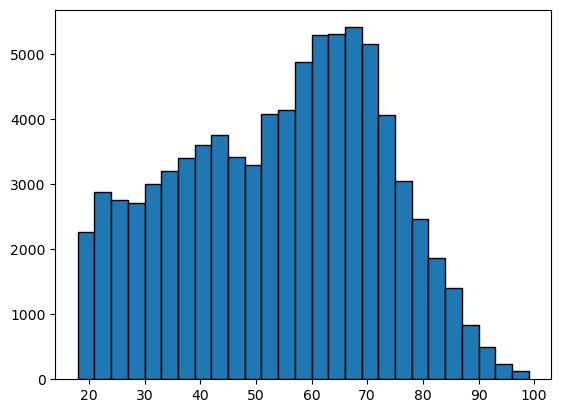

In [110]:
plt.hist(df["Age"], np.arange(18, 100, 3), edgecolor='black', lw=1)